In [1]:
%ls datasets

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       reg_data.csv
Book3.csv                  headbrain.csv  sample_pivot.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv


In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np 

In [5]:
df=pd.read_excel('datasets/Canada.xlsx',
                 sheet_name='Canada by Citizenship',
                 engine = 'openpyxl',
                 skiprows= range(20),
                 skipfooter=2
                )
df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


## description of dataset.
this dataset explains, blablabal one sentence

In [6]:
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

## Filtrar, eliminar columnas o datos irrelevantes
elimine tal tal porque me parecen irrelevantes para la solucion de preguntas

In [7]:
df.drop(['Type', 'Coverage','AREA','REG','DEV',  'DevName'],
        axis=1,
        inplace=True)
df.columns

Index([  'OdName', 'AreaName',  'RegName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

## renombramos las columnas

In [8]:
df.rename(columns = {'OdName':'Country', 
                     'AreaName':'Continent',  
                     'RegName':'Region'},
          inplace=True
         )

In [9]:
df.columns

Index([  'Country', 'Continent',    'Region',        1980,        1981,
              1982,        1983,        1984,        1985,        1986,
              1987,        1988,        1989,        1990,        1991,
              1992,        1993,        1994,        1995,        1996,
              1997,        1998,        1999,        2000,        2001,
              2002,        2003,        2004,        2005,        2006,
              2007,        2008,        2009,        2010,        2011,
              2012,        2013],
      dtype='object')

## cambiamos la variable de numeros a string (text)

In [10]:
df.columns=list(map(str,df.columns))
df.columns

Index(['Country', 'Continent', 'Region', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013'],
      dtype='object')

## Describir variables
* `country` - is a variable, column, represents the origin of the people. Type of variable: String
* `Continent:` - is a variable, columns, represents the continent of the country where they are from
* `Region:`- 
* `1980-2013`- This columns represents the number of inmigrants from different countries to Canada

## Pregunta #1
1. What is the distribution of inmigration from Japan to Canada during 1980 to 2013?

In [11]:
df

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,1191,1829,2162,3404,7583,5907,2741,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Western Sahara,Africa,Northern Africa,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
192,Yemen,Asia,Western Asia,1,2,1,6,0,18,7,...,124,161,140,122,133,128,211,160,174,217
193,Zambia,Africa,Eastern Africa,11,17,11,7,16,9,15,...,56,91,77,71,64,60,102,69,46,59


### como necesitamos algo de japon, hicimos que el INDEX o indice principal, sea country:

In [12]:
df.set_index('Country', inplace=True)
df.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,0,1,1,0,0,0,0,1,1


In [13]:
df.head(2)

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603


### localizamos Japon en todos los demas datos

In [14]:
df.loc['Japan',:]

Continent            Asia
Region       Eastern Asia
1980                  701
1981                  756
1982                  598
1983                  309
1984                  246
1985                  198
1986                  248
1987                  422
1988                  324
1989                  494
1990                  379
1991                  506
1992                  605
1993                  907
1994                  956
1995                  826
1996                  994
1997                  924
1998                  897
1999                 1083
2000                 1010
2001                 1092
2002                  806
2003                  817
2004                  973
2005                 1067
2006                 1212
2007                 1250
2008                 1284
2009                 1194
2010                 1168
2011                 1265
2012                 1214
2013                  982
Name: Japan, dtype: object

## para graficar: 

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### elegir estilo de la grafica 

In [18]:
print(mpl.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [28]:
mpl.style.use('seaborn')

### que no salgan los headings de continent ni region y graficar:

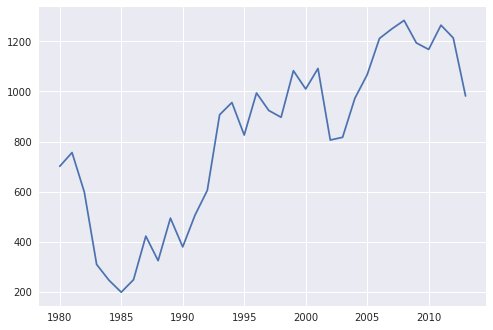

In [32]:
df.loc['Japan','1980':].plot()

## Conclusion:
 una conclusion de la pregunta


### Grafica que valide nuestra respuesta

##### intentar graficar

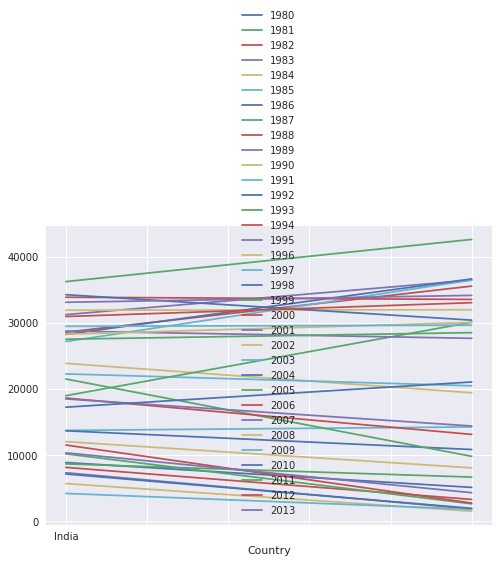

In [48]:
df.loc[['India','China'],'1980':].plot()

### claramente hay un error, observar datos para ver error:

In [49]:
df.loc[['India','China'],'1980':]#.plot()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


### tenemos que "transpose" la tabla

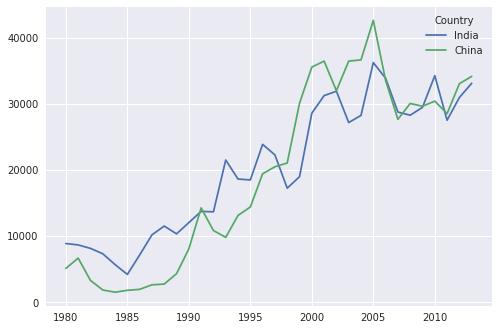

In [51]:
ci=df.loc[['India','China'],'1980':].transpose()
ci.plot()
plt.show()